# Imports, IO, and Initial Checks

In [94]:
import pandas as pd

import difflib

import matplotlib.pyplot as plt

In [95]:
try:  # time save if you regularly Run All, only populates df if it doesn't already exist
    character_data
except NameError:
    character_data = pd.read_csv(r"datasets\over_one_mil_chars.csv", index_col=0)

In [96]:
character_data.head(10)

,char_id,name,base_hp,stats_1,stats_2,stats_3,stats_4,stats_5,stats_6,background,...,class_starting_level,subclass_starting,class_other,subclass_other,total_level,feats,inventory,date_modified,notes_len,gold
0,1,Molster,8,11,22,11,17,20,12,Urban Bounty Hunter,...,4,NaN,NaN,NaN,4,NaN,Adamantine Chain Shirt/Cloak of Protection/Gog...,2022-09-12T19:13:03.29Z,17,305.00
1,3,Prailak,103,12,17,18,14,16,16,Charlatan,...,20,The Great Old One,NaN,NaN,20,"Spell Sniper (Bard, Sorcerer, Warlock)/Inferna...","Bag of Holding/Iron Flask/Studded Leather, +3/...",2021-12-07T21:25:36.9Z,60,0.00
2,8,Aurilanax,76,18,10,16,13,13,16,City Watch / Investigator,...,7,Oath of the Crown,NaN,NaN,7,NaN,Shield,2021-01-21T16:50:35Z,0,0.00
3,10,Gamndell Banglebon,127,10,14,16,16,15,18,Clan Crafter,...,2,NaN,Bard/Cleric/Wizard,School of Illusion,16,NaN,Give/Studded Leather/Dagger/Light Hammer/Ink (...,2020-08-06T16:05:07Z,65,4951.06
4,19,Bellek Bouncer,52,10,10,15,12,14,10,Sailor,...,6,Life Domain,NaN,NaN,6,NaN,Shield/Plate/Mace/Potion of Healing,2020-05-15T04:47:59Z,0,0.00
5,44,Yehudi,41,15,8,14,16,13,16,Far Traveler,...,5,Way of the Long Death,NaN,NaN,5,NaN,Shield,2022-11-08T02:58:57.507Z,157,5.00
6,45,Rockhand,82,18,14,17,7,8,13,Outlander,...,11,Path of the Wild Soul (archived),NaN,NaN,11,Dual Wielder,Amulet of Proof against Detection and Location...,2020-12-03T21:38:23.06Z,354,10305.75
7,48,Atherinnyia 'Rinn' Teshurr,62,8,14,13,17,12,15,Noble,...,13,School of Evocation,Sorcerer,Draconic Bloodline,15,Resilient (Constitution),Circlet of Blasting/Robe of Stars/Potion of He...,2022-10-31T07:40:18.41Z,2765,73.42
8,54,Althovion,58,12,15,15,13,15,16,Charlatan,...,14,Shadow Magic,NaN,NaN,14,Resilient (Dexterity)/Ritual Caster (Wizard),Bag of Holding/Circlet of Blasting/Cloak of th...,2021-09-21T06:33:28Z,3336,522.84
9,59,Veelan Pheer'ii,12,10,14,14,10,12,13,Far Traveler,...,5,Champion,Rogue,Thief,8,NaN,"Censer of Controlling Air Elementals/Shield, +...",2018-06-29T15:37:47Z,13,10.00


In [97]:
character_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1204252 entries, 0 to 1204251
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   char_id               1204252 non-null  int64  
 1   name                  1199602 non-null  object 
 2   base_hp               1204252 non-null  int64  
 3   stats_1               1204252 non-null  int64  
 4   stats_2               1204252 non-null  int64  
 5   stats_3               1204252 non-null  int64  
 6   stats_4               1204252 non-null  int64  
 7   stats_5               1204252 non-null  int64  
 8   stats_6               1204252 non-null  int64  
 9   background            898870 non-null   object 
 10  race                  1204252 non-null  object 
 11  class_starting        1204252 non-null  object 
 12  class_starting_level  1204252 non-null  int64  
 13  subclass_starting     607804 non-null   object 
 14  class_other           78814 non-null   

# Cleaning

## todo List
- char_id
    - ~~rename to id~~
- name
    - ~~handle missing~~
- base_hp
    - ~~handle outliers and negative values~~
- stat columns
    - ~~rename to proper stat names~~
- background
    - maybe standardize
    - ~~handle missing~~
    - categorize
- race
    - ~~standardize~~
- class_starting
    - ~~rename to starting_class~~
    - categorize
- class_starting_level
    - ~~rename to starting_class_level~~
- subclass_starting
    - ~~rename to starting_subclass~~
    - maybe standardize
    - ~~handle missing?~~
- class_other
    - ~~rename to multi_class~~
    - ~~drop~~
    - ~~drop row if value~~
- subclass_other
    - ~~rename to multi_class_subclass~~
    - ~~drop~~
    - ~~drop row if value~~
- total_level
    - ~~no change needed~~
    - ~~drop if fully same as class_starting_level~~
- feats
    - maybe standardize
- inventory
    - ~~drop~~
- date modified
    - ~~change to datetime~~
    - ~~maybe drop. 80% are june 29th 2018 which coincides with https://www.dndbeyond.com/old-changelog/256-character-sheet-revamp?srsltid=AfmBOor7jmjyOZZoWwW3D_DmSJJ7n6UM7j0-zOhzOsEVCXsmo7R4O72d~~
    - theory, this may actually be the "creation date" for the character sheet and not actually the date modified. can we verify this somehow?
    - ~~drop~~
- notes_len
    - ~~drop~~
- gold
    - ~~maybe handle outliers?~~


## Rename Columns

- There is no need to specify character id, there's no other id column, plus we may consider making this the index, so it feels apropriate to leave the label short.
    - char_id -> id
- rename the stats columns so they're less ambiguous
    - stats_1 -> strength
    - stats_2 -> dex
    - stats_3 -> constitution
    - stats_4 -> intelligence
    - stats_5 -> wisdom
    - stats_6 -> charisma
- rename class related columns for readability
    - class_starting -> starting_class,
    - class_starting_level -> starting_class_level,
    - subclass_starting -> starting_subclass,
    - class_other -> multi_class,
    - subclass_other -> multi_class_subclass,

In [98]:
character_data_renamed = character_data.rename(
    columns={
        # no need to specify character id, there's no other id column, plus we may consider making this the index, so it feels apropriate to leave the label short
        "char_id": "id",
        "stats_1": "strength",
        "stats_2": "dexterity",
        "stats_3": "constitution",
        "stats_4": "intelligence",
        "stats_5": "wisdom",
        "stats_6": "charisma",
        "class_starting": "class",
        "class_starting_level": "class_level",
        "subclass_starting": "subclass",
        "class_other": "multi_class",
        "subclass_other": "multi_class_subclass",
    }
).copy()

## Drop Duplicates
~~drop in character ID and date modified~~  
 Dropping duplicates drops the row count more than 50%. Assumption: characters may be duplicated between players and GM's. Some characters may be duplicated multiple times while others may not be duplicated at all. Since this is arbitrary and could inflate statistics, we simply drop duplicates.

In [99]:
char_data_duplicates_dropped = character_data_renamed.drop_duplicates().copy()
print(f"Length Before: {len(character_data_renamed)}")
print(f"Length After: {len(char_data_duplicates_dropped)}")

Length Before: 1204252
Length After: 511318


## Drop Unnecessary Columns and Data
- dropping inventory because it has a large amount missing and is a mess of string data that would need to be searched through and possibly joined with other data to come to meaningful conclusions
- dropping date modified because 80% are set to a date where presumable an architecture revamp happened (based on linked article). Does this mean that 80% of characters have been untouched since 2018? is this actually supposed to represent the date created? either way it's ambiguous and largely meaningless data.
- dropping notes_len as it doesn't contain meaningful data, there are no notes to actually look at/compare to, and there's no insights we want to draw from the length of a player's notes
- dropping rows with multi_class data as over 90% are missing (both multi_class and multi_class_subclass), but we don't want to only drop the columns and end up with rows with explicitly missing data

In [100]:
char_data_drop = char_data_duplicates_dropped.drop(
    columns=["inventory", "date_modified", "notes_len"]
).copy()

has_multiclass = (
    ~char_data_drop["multi_class"].isna()
    | ~char_data_drop["multi_class_subclass"].isna()
)

char_data_drop.drop(char_data_drop[has_multiclass].index, inplace=True)
print(
    f"Dropped {has_multiclass.value_counts()[True]} characters which had multiclass data"
)

char_data_drop.drop(columns=["multi_class", "multi_class_subclass"], inplace=True)

Dropped 33247 characters which had multiclass data


## Check total level is the same as starting_class_level

In [101]:
levels_match = char_data_drop["class_level"] == char_data_drop["total_level"]

if not levels_match.all():
    print("Well that's not right")
    print(char_data_drop[levels_match].head())
else:
    char_data_drop.drop(columns=["total_level"], inplace=True)

## Strip Trailing Spaces and Normalize Capitalization

In [102]:
char_data_standardized = char_data_duplicates_dropped.copy()

char_data_standardized["race"] = char_data_standardized["race"].str.title().str.strip()

## Standardize and Categorize Races
ex there are four instances of 'elf'  
they're all a flavour of elf so combining them  
many variations are different spellings of one another  
i.e fae / faerie / fairy

In [103]:
# DND5E Races (Lineages) according to: https://dnd5e.wikidot.com/lineage
default_races: dict[str, str] = {
    # Standard
    "Dragonborn": "Standard",
    "Dwarf": "Standard",
    "Elf": "Standard",
    "Gnome": "Standard",
    "Half-Elf": "Standard",
    "Half-Orc": "Standard",
    "Halfling": "Standard",
    "Human": "Standard",
    "Tiefling": "Standard",
    # Exotic
    "Aarakocra": "Exotic",
    "Aasimar": "Exotic",
    "Changeling": "Exotic",
    "Deep Gnome": "Exotic",
    "Duergar": "Exotic",
    "Eladrin": "Exotic",
    "Fairy": "Exotic",
    "Firbolg": "Exotic",
    "Genasi (Air)": "Exotic",
    "Genasi (Earth)": "Exotic",
    "Genasi (Fire)": "Exotic",
    "Genasi (Water)": "Exotic",
    "Githyanki": "Exotic",
    "Githzerai": "Exotic",
    "Goliath": "Exotic",
    "Harengon": "Exotic",
    "Kenku": "Exotic",
    "Locathah": "Exotic",
    "Owlin": "Exotic",
    "Satyr": "Exotic",
    "Sea Elf": "Exotic",
    "Shadar-Kai": "Exotic",
    "Tabaxi": "Exotic",
    "Tortle": "Exotic",
    "Triton": "Exotic",
    "Verdan": "Exotic",
    # Monstrous
    "Bugbear": "Monstrous",
    "Centaur": "Monstrous",
    "Goblin": "Monstrous",
    "Grung": "Monstrous",
    "Hobgoblin": "Monstrous",
    "Kobold": "Monstrous",
    "Lizardfolk": "Monstrous",
    "Minotaur": "Monstrous",
    "Orc": "Monstrous",
    "Shifter": "Monstrous",
    "Yuan-Ti": "Monstrous",
    # Setting Specific
    "Kender": "Setting Specific (Dragonlance, Unearthed Arcana)",
    "Kalashtar": "Setting Specific (Eberron)",
    "Warforged": "Setting Specific (Eberron)",
    "Aetherborn": "Setting Specific (Plane Shift)",
    "Aven": "Setting Specific (Plane Shift)",
    "Khenra": "Setting Specific (Plane Shift)",
    "Kor": "Setting Specific (Plane Shift)",
    "Merfolk": "Setting Specific (Plane Shift)",
    "Naga": "Setting Specific (Plane Shift)",
    "Siren": "Setting Specific (Plane Shift)",
    "Vampire": "Setting Specific (Plane Shift)",
    "Dhampir": "Setting Specific (Ravenloft)",
    "Hexblood": "Setting Specific (Ravenloft)",
    "Reborn": "Setting Specific (Ravenloft)",
    "Loxodon": "Setting Specific (Ravnica)",
    "Simic Hybrid": "Setting Specific (Ravnica)",
    "Vedalken": "Setting Specific (Ravnica)",
    "Astral Elf": "Setting Specific (Spelljammer)",
    "Autognome": "Setting Specific (Spelljammer, Unearthed Arcana)",
    "Giff": "Setting Specific (Spelljammer, Unearthed Arcana)",
    "Hadozee": "Setting Specific (Spelljammer, Unearthed Arcana)",
    "Plasmoid": "Setting Specific (Spelljammer, Unearthed Arcana)",
    "Thri-kreen": "Setting Specific (Spelljammer, Unearthed Arcana)",
    "Leonin": "Setting Specific (Theros)",
    "Glitchling": "Setting Specific (Unearthed Arcana)",
    "Kender Revised": "Setting Specific (Unearthed Arcana)",
    "Owlfolk": "Setting Specific (Unearthed Arcana)",
    "Rabbitfolk": "Setting Specific (Unearthed Arcana)",
    "Revenant": "Setting Specific (Unearthed Arcana)",
    "Viashino": "Setting Specific (Unearthed Arcana)",
}

# List of base DND5E race names
valid_races = set(default_races.keys())

In [104]:
sanity_check = pd.DataFrame(
    columns=["race", "standardized_match", "count"]
)  # available to check what's being replaced afterwards
sanity_check.set_index("race", inplace=True)

defaults_sanity_check = pd.DataFrame(
    {"race": list(valid_races)}, columns=["race", "count"]
)  # available to check what defaults are actually showing up
defaults_sanity_check.set_index("race", inplace=True)
defaults_sanity_check["count"] = 0


standardize_threshold = 0.6  # Adjust if necessary


# Function to match races
def standardize_race(race: str):
    match = difflib.get_close_matches(race, default_races, 1, standardize_threshold)

    # if there is a match, add or increment sanity check, then return
    if len(match) > 0 and match[0] != race:
        if race not in sanity_check.index:
            sanity_check.loc[race] = [match[0], 1]
        else:
            sanity_check.loc[race, "count"] += 1

        return match[0]
    # if there are no matches, or the match and race are equal, then just return race as-is
    elif race in defaults_sanity_check.index:

        defaults_sanity_check.loc[race, "count"] += 1

    return race


# Apply functions
char_data_standardized["standardized_race"] = char_data_standardized["race"].apply(
    standardize_race
)

In [105]:
# Function to categorize races
def discretize_race(race: str):

    if race == "Genasi" or "Archived" in race:
        return "Legacy"

    # TODO: add "Legacy" category
    race
    if race in default_races:
        return default_races[race]
    else:
        return "Homebrew"


# should we use "race" column or "standardized_race" column for the categorization?
char_data_standardized["race_category"] = (
    char_data_standardized["standardized_race"]
    .apply(discretize_race)
    .astype("category")
)

In [106]:
def get_invalid_count(df, column, valid_list):
    invalid_mask = ~df[column].isin(valid_list)
    incorrect_count = len(df[invalid_mask])

    return incorrect_count


inv_count = get_invalid_count(
    char_data_drop, "race", valid_races
)  # use dataframe from previous step
print("~Incorrect Races~")
print(f"    {inv_count} values")

inv_count = get_invalid_count(
    char_data_standardized, "standardized_race", valid_races
)  # use current dataframe
print("\n~Remaining Errors~")
print(f"    {inv_count} values")

~Incorrect Races~
    24256 values

~Remaining Errors~
    3332 values


## Handle Missing Values

In [ ]:
# fill 'name' NA's with Unknown

# there are names like "no name" and "nameless" so those shouldn't be options for filling NA
char_data_standardized.fillna(
    {"name": "N/A", "background": "no background", "subclass": "no subclass"},
    inplace=True,
)

## Handle Outliers and Negative Values
- base_hp
- gold

In [108]:
char_data_handle_outliers = char_data_standardized.copy()

# clamp base hp to > 0, because otherwise the character should reasonably be dead
ded = char_data_handle_outliers["base_hp"] <= 0

char_data_handle_outliers.loc[ded, "base_hp"] = 1

# remove 0.0 values from gold, since that perhaps shouldn't be considered a value; it's skewing the data low since so many characters have
none = char_data_handle_outliers["gold"] <= 0

char_data_handle_outliers.loc[none, "gold"] = pd.NA


def set_outliers_to(df: pd.DataFrame, column: str, set_value: int = pd.NA):

    # Calculate quartiles and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)

    # Set outliers to set_value
    df.loc[outliers, column] = set_value


set_outliers_to(char_data_handle_outliers, "base_hp")
base_hp_mean = char_data_handle_outliers["base_hp"].mean()

set_outliers_to(char_data_handle_outliers, "gold")
gold_mean = char_data_handle_outliers["gold"].mean()


char_data_handle_outliers.fillna(
    {"base_hp": base_hp_mean, "gold": gold_mean}, inplace=True
)

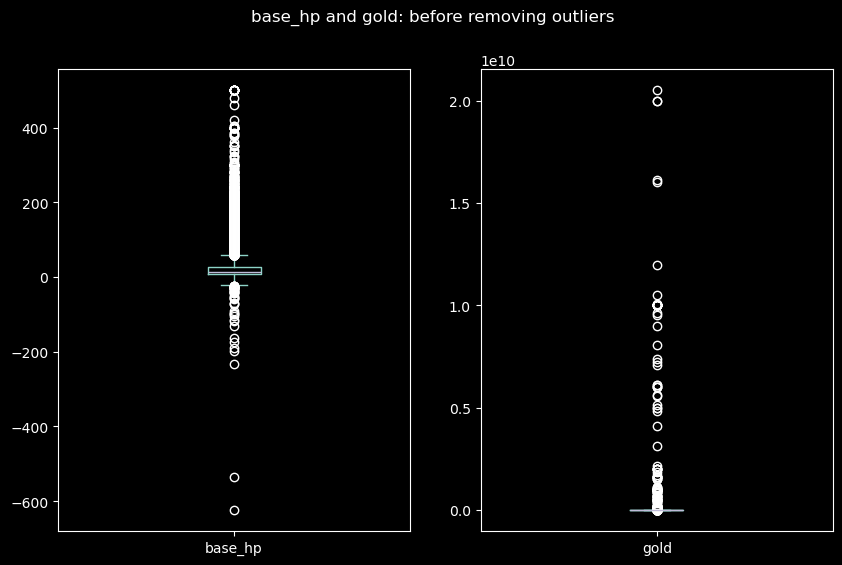

In [109]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 6))
char_data_standardized["base_hp"].plot.box(ax=axes[0])
char_data_standardized["gold"].plot.box(ax=axes[1])
plt.suptitle("base_hp and gold: before removing outliers")
plt.show()

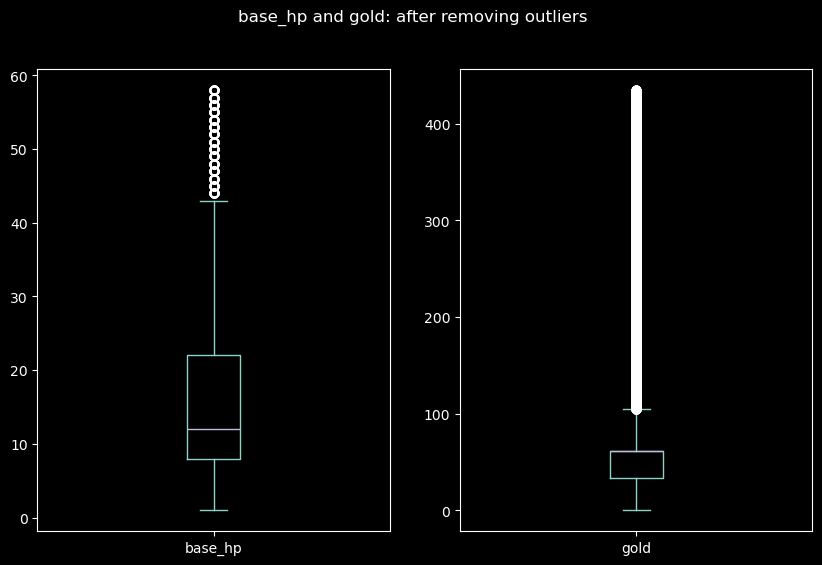

In [110]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 6))
char_data_handle_outliers["base_hp"].plot.box(ax=axes[0])
char_data_handle_outliers["gold"].plot.box(ax=axes[1])
plt.suptitle("base_hp and gold: after removing outliers")
plt.show()